# Togo Solar Dataset EDA

**Objective:** Perform end-to-end profiling, cleaning, and exploratory data analysis of Benin’s solar dataset.  
**Author:** Tselot Million 
**Date:** 2025-11-06


In [2]:
# imports & setup
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline
plt.rcParams.update({'figure.figsize': (12,6)})
sns.set(style="whitegrid")


In [3]:
import os

os.listdir("../data")


['benin_clean.csv',
 'sierraleone-bumbuna.csv',
 'togo_clean.csv',
 'togo-dapaong_qc.csv',
 'benin-malanville.csv',
 'sierraleone_clean.csv']

In [4]:
country = "togo"   
raw_path = f"../data/{country}-dapaong_qc.csv"   
assert os.path.exists(raw_path), f"{raw_path} not found"

df = pd.read_csv(raw_path, parse_dates=["Timestamp"], dayfirst=False)
df = df.sort_values("Timestamp").reset_index(drop=True)
df.head()


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04:00,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05:00,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


In [5]:
# basic info & numeric summary
df.info()
display(df.describe())

# missing values
na_counts = df.isna().sum()
na_pct = (na_counts / len(df)) * 100
missing_report = pd.DataFrame({"count": na_counts, "pct_null": na_pct}).sort_values("pct_null", ascending=False)
display(missing_report)

# list columns with > 5% nulls
cols_over_5pct = missing_report[missing_report['pct_null'] > 5].index.tolist()
cols_over_5pct


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Timestamp      525600 non-null  datetime64[ns]
 1   GHI            525600 non-null  float64       
 2   DNI            525600 non-null  float64       
 3   DHI            525600 non-null  float64       
 4   ModA           525600 non-null  float64       
 5   ModB           525600 non-null  float64       
 6   Tamb           525600 non-null  float64       
 7   RH             525600 non-null  float64       
 8   WS             525600 non-null  float64       
 9   WSgust         525600 non-null  float64       
 10  WSstdev        525600 non-null  float64       
 11  WD             525600 non-null  float64       
 12  WDstdev        525600 non-null  float64       
 13  BP             525600 non-null  int64         
 14  Cleaning       525600 non-null  int64         
 15  

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,2022-04-25 12:00:30.000000768,230.555040,151.258469,116.444352,226.144375,219.568588,27.751788,55.013160,2.368093,3.229490,0.557740,161.741845,10.559568,975.915242,0.000535,0.001382,32.444403,33.543330,NaN
min,2021-10-25 00:01:00,-12.700000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.100000,13.100000,NaN
25%,2022-01-24 06:00:45,-2.200000,0.000000,0.000000,0.000000,0.000000,24.200000,26.500000,1.400000,1.900000,0.400000,74.800000,6.900000,975.000000,0.000000,0.000000,23.900000,23.600000,NaN
50%,2022-04-25 12:00:30,2.100000,0.000000,2.500000,4.400000,4.300000,27.200000,59.300000,2.200000,2.900000,0.500000,199.100000,10.800000,976.000000,0.000000,0.000000,28.400000,28.400000,NaN
75%,2022-07-25 18:00:15,442.400000,246.400000,215.700000,422.525000,411.000000,31.100000,80.800000,3.200000,4.400000,0.700000,233.500000,14.100000,977.000000,0.000000,0.000000,40.600000,43.000000,NaN
max,2022-10-25 00:00:00,1424.000000,1004.500000,805.700000,1380.000000,1367.000000,41.400000,99.800000,16.100000,23.100000,4.700000,360.000000,86.900000,983.000000,1.000000,2.300000,70.400000,94.600000,NaN
std,NaN,322.532347,250.956962,156.520714,317.346938,307.932510,4.758023,28.778732,1.462668,1.882565,0.268923,91.877217,5.915490,2.153977,0.023116,0.026350,10.998334,12.769277,NaN


,count,pct_null
Comments,525600,100.0
WSstdev,0,0.0
TModB,0,0.0
TModA,0,0.0
Precipitation,0,0.0
Cleaning,0,0.0
BP,0,0.0
WDstdev,0,0.0
WD,0,0.0
Timestamp,0,0.0


['Comments']

**Columns with >5% missing values:** [paste output from previous cell]

**Cleaning plan:**  
- Drop unnecessary columns (e.g., 'Comments')  
- Impute key numeric columns with median

In [6]:
target_cols = ["GHI","DNI","DHI","ModA","ModB","WS","WSgust"]
target_cols = [c for c in target_cols if c in df.columns]

# compute z-scores (uses population std; ddof=0)
z = df[target_cols].apply(lambda x: (x - x.mean()) / x.std(ddof=0))
for c in target_cols:
    df[c + "_zscore"] = z[c]
df['any_outlier_z3'] = z.abs().gt(3).any(axis=1)

# summary
outlier_counts = pd.Series({c: (z[c].abs() > 3).sum() for c in target_cols})
display(outlier_counts)
print("Rows with any |Z|>3:", df['any_outlier_z3'].sum())


GHI        305
DNI       1062
DHI       3415
ModA       137
ModB       206
WS        3510
WSgust    3915
dtype: int64

Rows with any |Z|>3: 9251


In [7]:
# Drop columns with mostly missing data
if 'Comments' in df.columns:
    df = df.drop(columns=['Comments'])

# Median imputation for key columns
key_cols = ["GHI","DNI","DHI","ModA","ModB","Tamb","RH","WS","WSgust"]
key_cols = [c for c in key_cols if c in df.columns]

for c in key_cols:
    df[c] = df[c].fillna(df[c].median())

df[key_cols].isna().sum()


GHI       0
DNI       0
DHI       0
ModA      0
ModB      0
Tamb      0
RH        0
WS        0
WSgust    0
dtype: int64

In [ ]:
Record median values used for reproducibility.

In [8]:
clean_path = f"../data/{country}_clean.csv"
df.to_csv(clean_path, index=False)
print("Saved cleaned data to:", clean_path)


Saved cleaned data to: ../data/togo_clean.csv


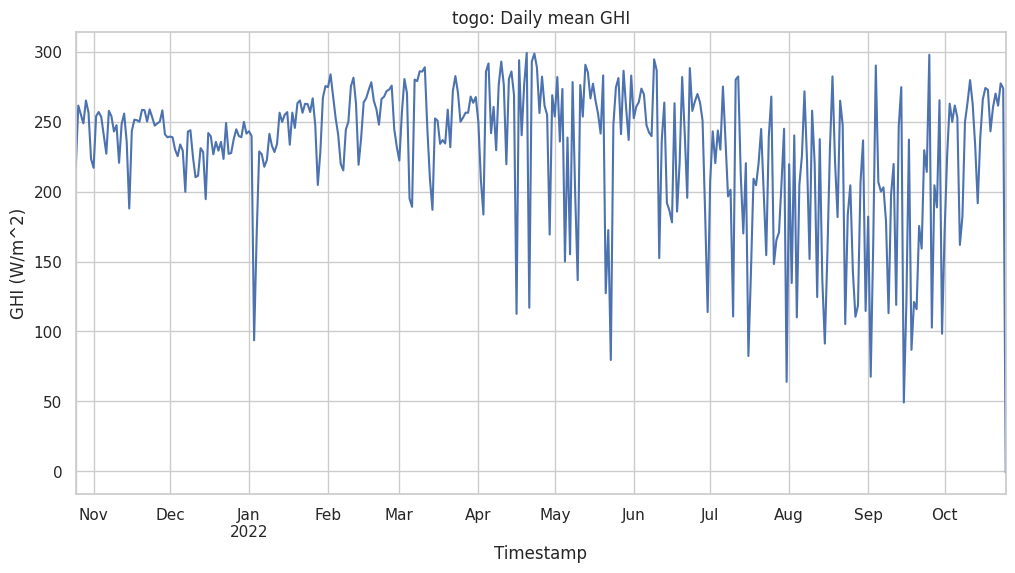

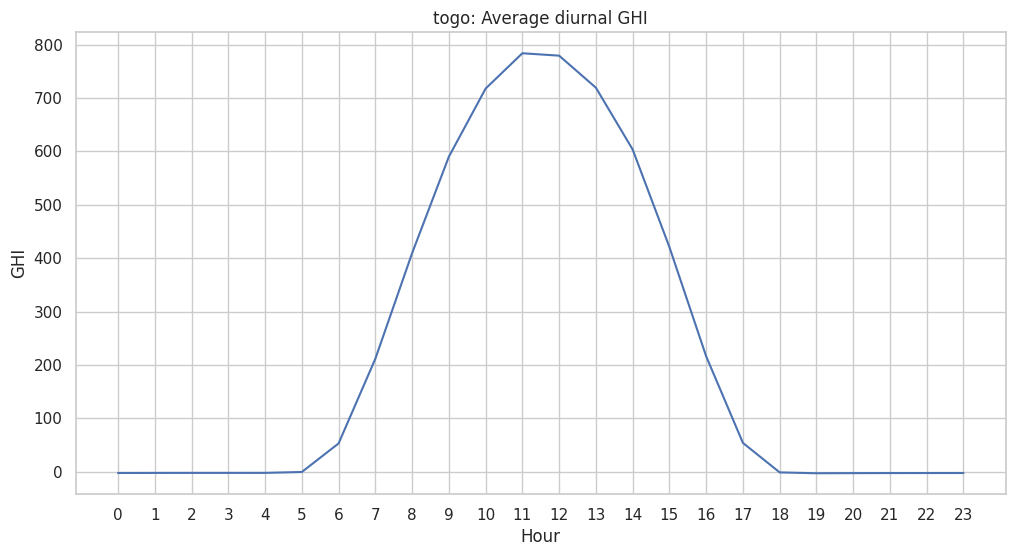

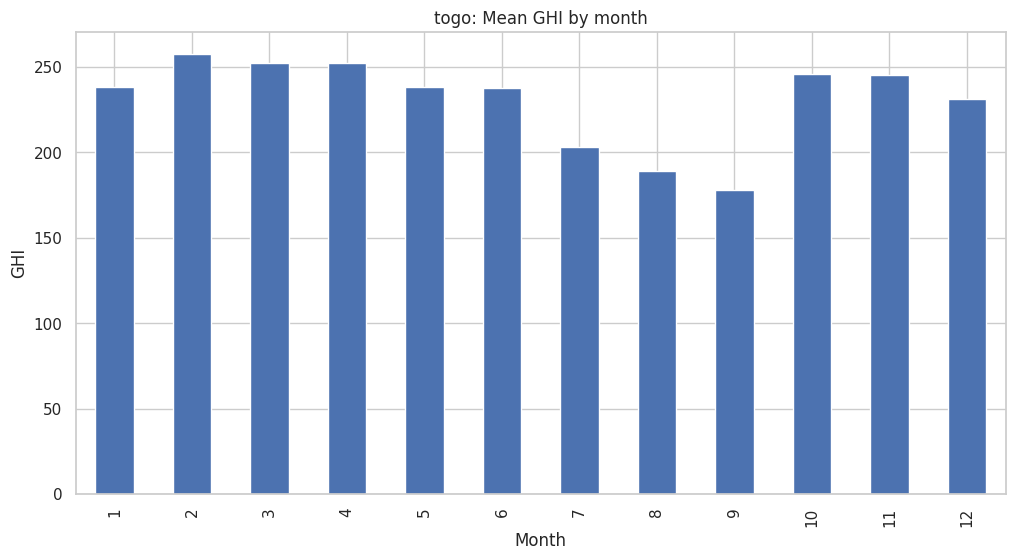

In [11]:
df_ts = df.set_index('Timestamp').sort_index()

# Daily mean GHI
if 'GHI' in df_ts.columns:
    df_ts['GHI'].resample('D').mean().plot(title=f"{country}: Daily mean GHI", ylabel="GHI (W/m^2)")
    plt.show()

# Diurnal pattern
df_ts['hour'] = df_ts.index.hour
if 'GHI' in df_ts.columns:
    hourly = df_ts.groupby('hour')['GHI'].mean()
    hourly.plot(title=f"{country}: Average diurnal GHI", xlabel="Hour", ylabel="GHI")
    plt.xticks(range(0,24))
    plt.show()

# Monthly patterns
df_ts['month'] = df_ts.index.month
if 'GHI' in df_ts.columns:
    df_ts.groupby('month')['GHI'].mean().plot(kind='bar', title=f"{country}: Mean GHI by month", xlabel='Month', ylabel='GHI')
    plt.show()


Comment on patterns: peaks, low months, anomalies.

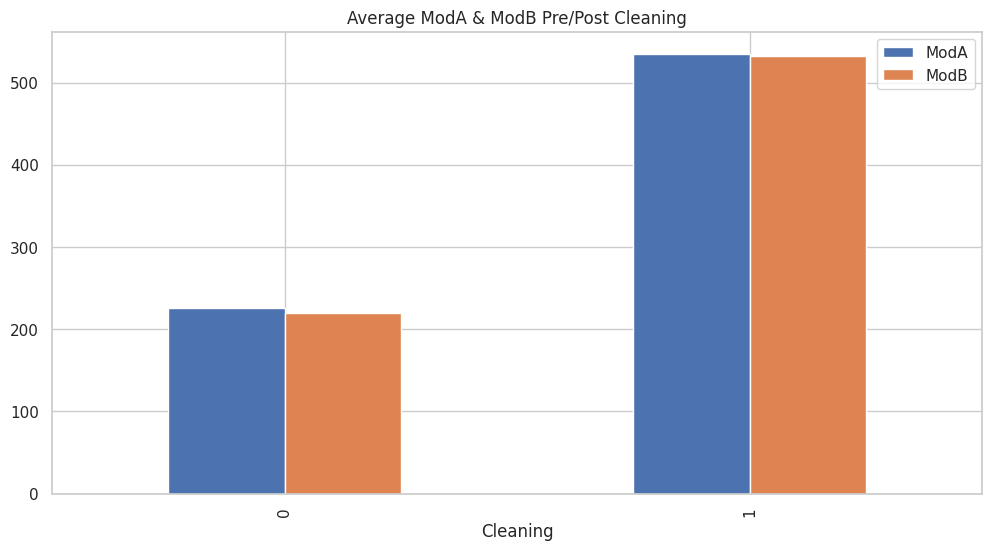

In [12]:
if 'Cleaning' in df.columns:
    df.groupby('Cleaning')[['ModA','ModB']].mean().plot(kind='bar', title="Average ModA & ModB Pre/Post Cleaning")
    plt.show()

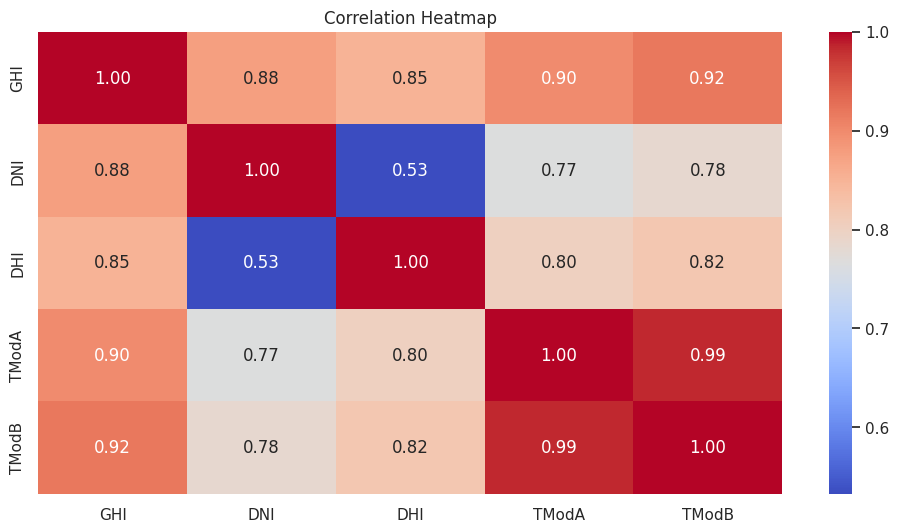

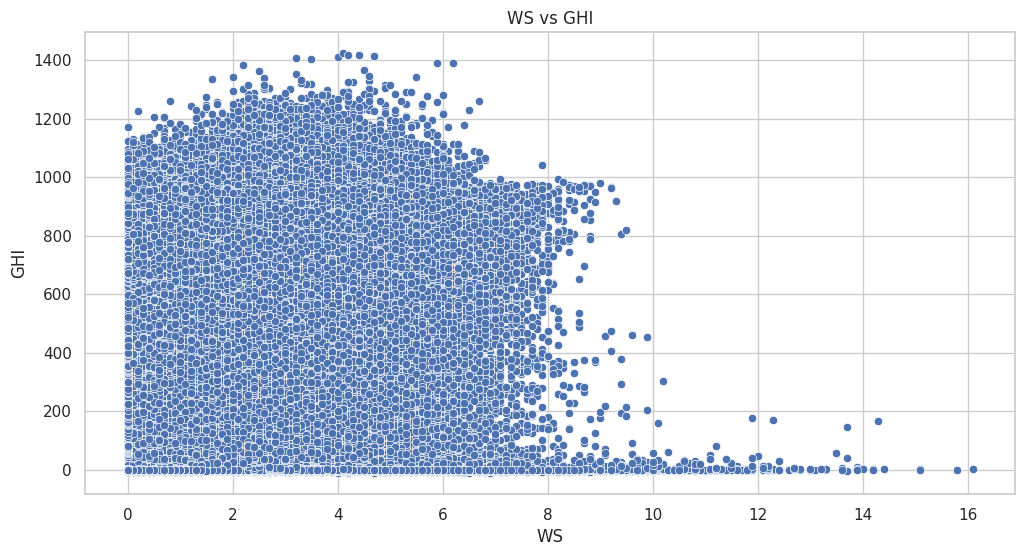

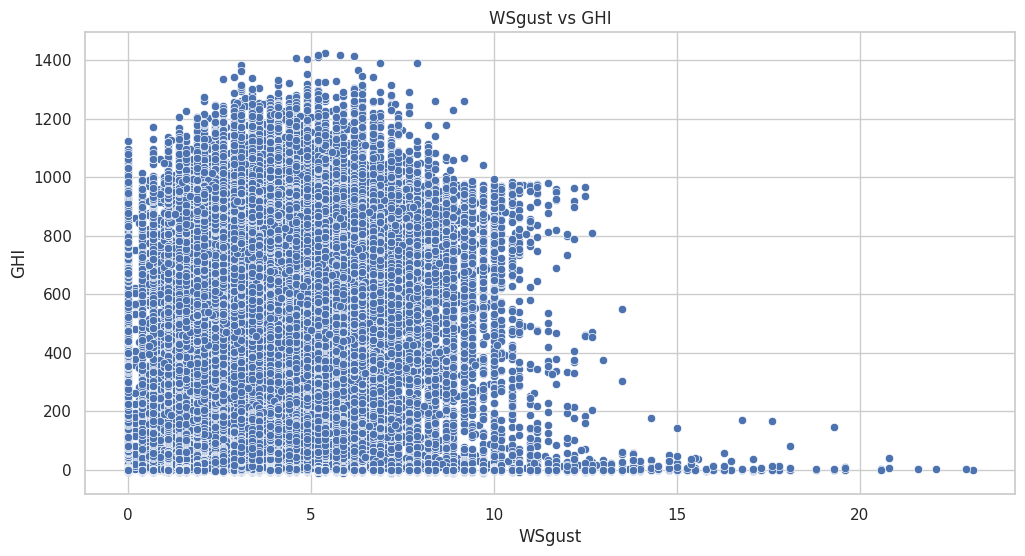

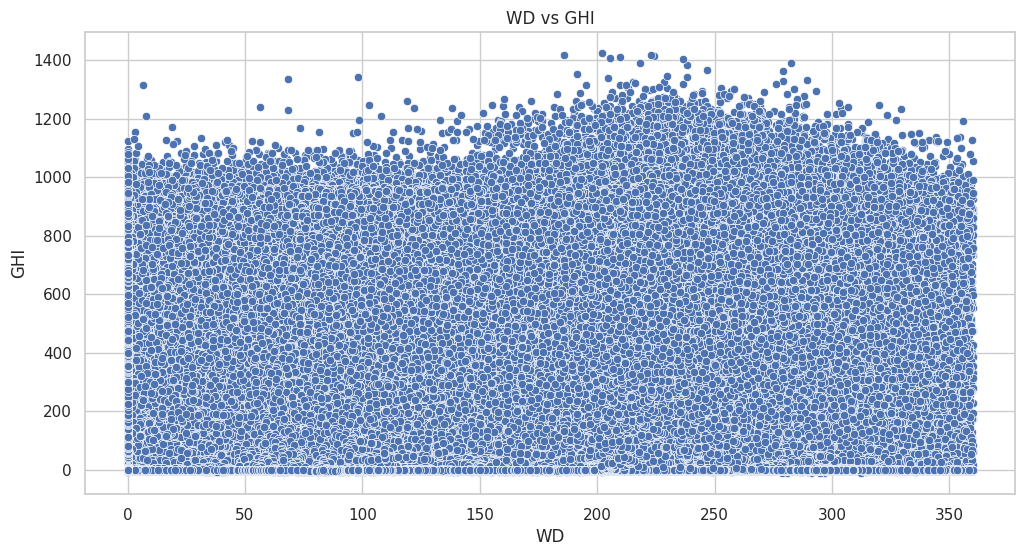

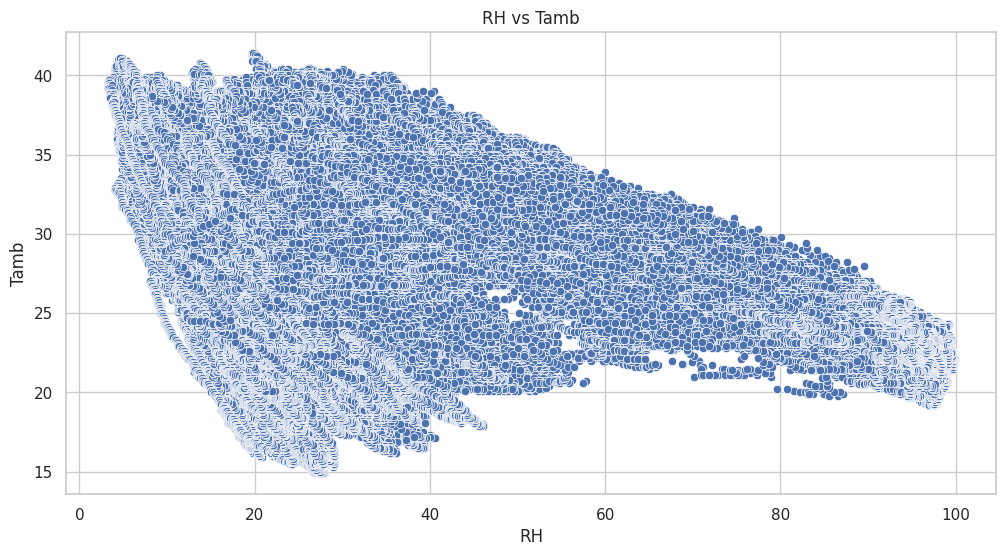

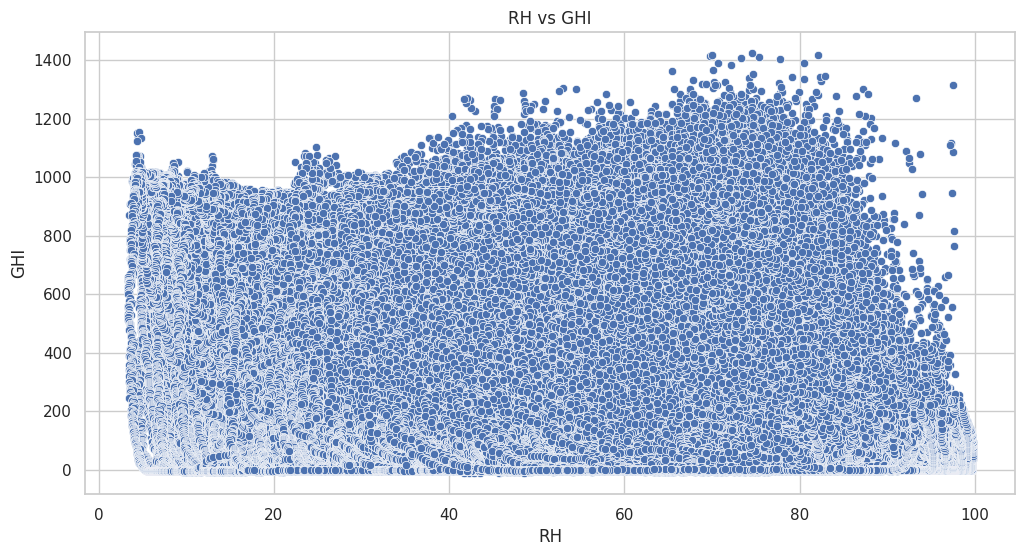

In [13]:
corr_cols = ['GHI','DNI','DHI','TModA','TModB']
corr_cols = [c for c in corr_cols if c in df.columns]

# Heatmap
sns.heatmap(df[corr_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Scatter plots WS, WSgust, WD vs. GHI
for col in ['WS','WSgust','WD']:
    if col in df.columns:
        sns.scatterplot(data=df, x=col, y='GHI')
        plt.title(f"{col} vs GHI")
        plt.show()

# Scatter RH vs Tamb and RH vs GHI
if 'RH' in df.columns and 'Tamb' in df.columns:
    sns.scatterplot(data=df, x='RH', y='Tamb')
    plt.title("RH vs Tamb")
    plt.show()

if 'RH' in df.columns:
    sns.scatterplot(data=df, x='RH', y='GHI')
    plt.title("RH vs GHI")
    plt.show()


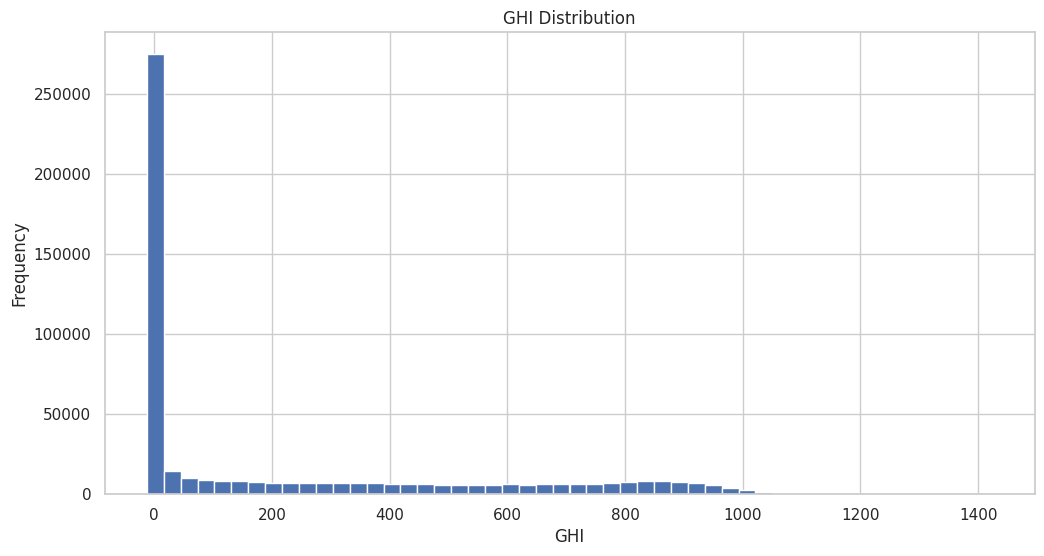

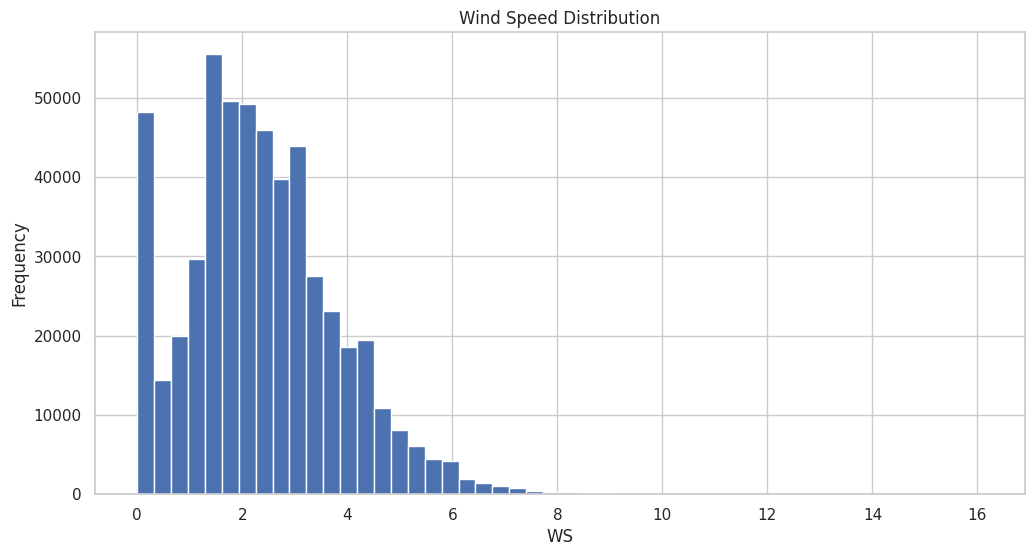

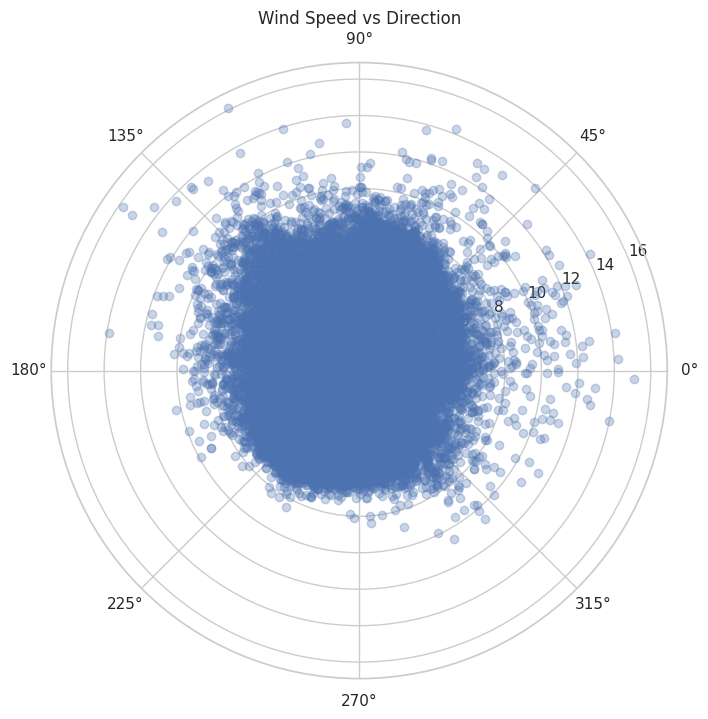

In [14]:
# Histogram for GHI
df['GHI'].hist(bins=50)
plt.title("GHI Distribution")
plt.xlabel("GHI")
plt.ylabel("Frequency")
plt.show()

# Histogram for WS
if 'WS' in df.columns:
    df['WS'].hist(bins=50)
    plt.title("Wind Speed Distribution")
    plt.xlabel("WS")
    plt.ylabel("Frequency")
    plt.show()

# Simple Wind Rose (radial scatter)
if 'WS' in df.columns and 'WD' in df.columns:
    plt.figure(figsize=(8,8))
    theta = np.deg2rad(df['WD'])
    r = df['WS']
    plt.subplot(111, polar=True)
    plt.scatter(theta, r, alpha=0.3)
    plt.title("Wind Speed vs Direction")
    plt.show()


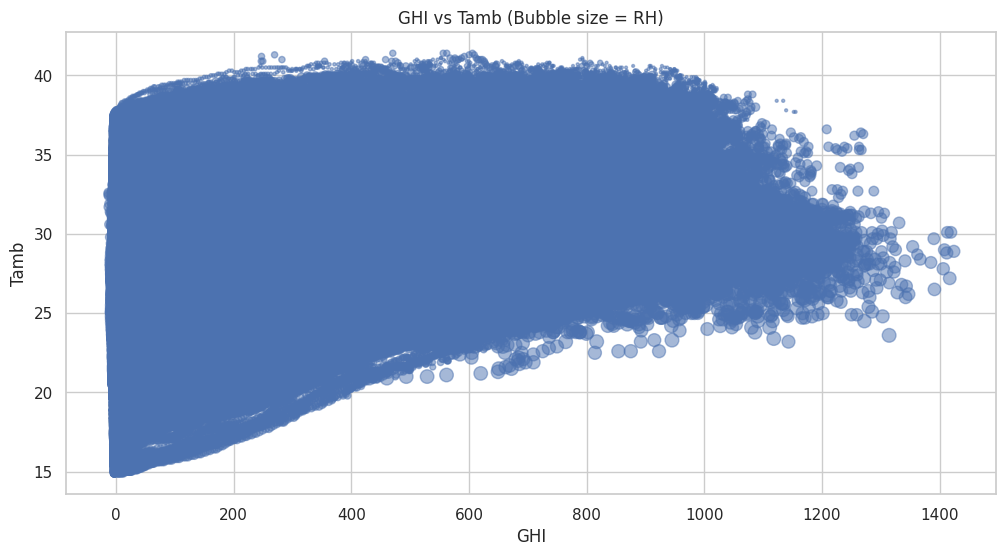

In [17]:
# Bubble chart GHI vs Tamb with RH size
if all(c in df.columns for c in ['GHI','Tamb','RH']):
    plt.scatter(df['GHI'], df['Tamb'], s=df['RH'], alpha=0.5)
    plt.xlabel("GHI")
    plt.ylabel("Tamb")
    plt.title("GHI vs Tamb (Bubble size = RH)")
    plt.show()


## Key Insights / KPIs

1. **References / Self-learning:** [Add links to tutorials, papers, or documentation you used]  
2. **EDA Techniques Applied:** summary stats, missing values, Z-score outlier detection, time series plots, scatter plots, heatmaps, histograms, bubble charts  
3. **Observations / Insights:**  
   - Solar peaks and low periods: [fill based on your plots]  
   - Correlations between solar irradiance and sensor readings: [fill based on heatmap]  
   - Impact of cleaning on ModA/ModB: [fill based on cleaning plot]  
   - Wind and temperature trends: [fill based on wind/temperature plots]  
   - Influence of RH on temperature and GHI: [fill based on bubble chart]
